# WeightWatcher

https://calculationconsulting.com

In [10]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [11]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher

set custom Logging at WARN Level

In [12]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARN)

import weightwatcher as ww
import torchvision.models as models

ww.__version__


'0.2.1'

### Create all models now

In [13]:

all_names = [ 'densenet121', 'densenet169', 'densenet201', 'densenet161']

all_models = []
all_models.append(models.densenet121(pretrained=True))
all_models.append(models.densenet161(pretrained=True))
all_models.append(models.densenet169(pretrained=True))
all_models.append(models.densenet201(pretrained=True))




/Users/charleshmartin/anaconda3/lib/python3.7/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


### Get reported accuracies from pytorch website

https://pytorch.org/docs/stable/torchvision/models.html


<pre>
<table class="docutils align-default">
<colgroup>
<col style="width: 55%" />
<col style="width: 22%" />
<col style="width: 22%" />
</colgroup>
<thead>
<thead>
<tr class="row-odd"><th class="head"><p>Network</p></th>
<th class="head"><p>Top-1 error</p></th>
<th class="head"><p>Top-5 error</p></th>
</tr>
</thead>
<tbody>

<tr class="row-even"><td><p>Densenet-121</p></td>
<td><p>25.35</p></td>
<td><p>7.83</p></td>
</tr>
<tr class="row-odd"><td><p>Densenet-169</p></td>
<td><p>24.00</p></td>
<td><p>7.00</p></td>
</tr>
<tr class="row-even"><td><p>Densenet-201</p></td>
<td><p>22.80</p></td>
<td><p>6.43</p></td>
</tr>
<tr class="row-odd"><td><p>Densenet-161</p></td>
<td><p>22.35</p></td>
<td><p>6.20</p></td>
</tr>

</tbody>
</table>
</pre>

In [21]:
top1_errors= {
    
    "densenet121": 25.35,
    "densenet169": 24.00,
    "densenet201": 22.80,
    "densenet161": 22.35 

}

In [22]:
top5_errors= {
    
    "densenet121": 7.83,
    "densenet169": 7.00,
    "densenet201": 6.43,
    "densenet161": 6.20 

}

### Run WeightWatcher, collect all details (as dataframes)

In [30]:
all_details = []

for im, name in enumerate(all_names):
    watcher = ww.WeightWatcher(model=all_models[im])
    results = watcher.analyze(alphas=True, softranks=True, spectralnorms=True, mp_fit=True)

    details  = watcher.get_details(results=results)
    details.drop(columns=['slice', 'slice_count'], inplace=True)
    details.dropna(inplace=True)
    details['NxM'] = pd.to_numeric(details.N * details.M)

    all_details.append(details)

2019-12-25 15:50:52,469 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-25 15:50:52,473 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-25 15:51:12,885 INFO ### Printing results ###
INFO:weightwatcher.weightwatcher:### Printing results ###
2019-12-25 15:51:24,802 INFO Norm: min: 2.995245933532715, max: 49.79620361328125, avg: 7.182215213775635
INFO:weightwatcher.weightwatcher:Norm: min: 2.995245933532715, max: 49.79620361328125, avg: 7.182215213775635
2019-12-25 15:51:24,803 INFO Norm compound: min: 2.995245933532715, max: 49.79620361328125, avg: 7.182215213775635
INFO:weightwatcher.weightwatcher:Norm c

2019-12-25 15:51:36,749 INFO Alpha Weighted compound: min: 0.008693975557159686, max: 5.94823029961731, avg: 1.2487075047250407
INFO:weightwatcher.weightwatcher:Alpha Weighted compound: min: 0.008693975557159686, max: 5.94823029961731, avg: 1.2487075047250407
2019-12-25 15:51:36,750 INFO Spectral Norm: min: 0.03809740021824837, max: 61.71644973754883, avg: 0.7861841917037964
INFO:weightwatcher.weightwatcher:Spectral Norm: min: 0.03809740021824837, max: 61.71644973754883, avg: 0.7861841917037964
2019-12-25 15:51:36,751 INFO Spectral Norm compound: min: 0.06839726120233536, max: 61.71644973754883, avg: 1.6990129947662354
INFO:weightwatcher.weightwatcher:Spectral Norm compound: min: 0.06839726120233536, max: 61.71644973754883, avg: 1.6990129947662354
2019-12-25 15:51:36,752 INFO Softrank: min: 8.599090665132225, max: 54.81072540648038, avg: 22.60894828512914
INFO:weightwatcher.weightwatcher:Softrank: min: 8.599090665132225, max: 54.81072540648038, avg: 22.60894828512914
2019-12-25 15:51:3

2019-12-25 15:52:32,203 INFO Softrank Log Ratio: min: -89.65885288398604, max: 53.76457766786709, avg: 3.8830669845044308
INFO:weightwatcher.weightwatcher:Softrank Log Ratio: min: -89.65885288398604, max: 53.76457766786709, avg: 3.8830669845044308
2019-12-25 15:52:32,204 INFO Softrank Log Ratio compound: min: -89.65885288398604, max: 53.76457766786709, avg: 3.8830669845044308
INFO:weightwatcher.weightwatcher:Softrank Log Ratio compound: min: -89.65885288398604, max: 53.76457766786709, avg: 3.8830669845044308
2019-12-25 15:52:32,205 INFO Marchenko-Pastur (MP) fit sigma: min: 0.3, max: 1.0139648437500002, avg: 0.4012574879716082
INFO:weightwatcher.weightwatcher:Marchenko-Pastur (MP) fit sigma: min: 0.3, max: 1.0139648437500002, avg: 0.4012574879716082
2019-12-25 15:52:32,206 INFO Marchenko-Pastur (MP) fit sigma compound: min: 0.3, max: 1.0139648437500002, avg: 0.4012574879716082
INFO:weightwatcher.weightwatcher:Marchenko-Pastur (MP) fit sigma compound: min: 0.3, max: 1.0139648437500002, 

INFO:weightwatcher.weightwatcher:Softrank for MP fit: min: 0.0042952601911170245, max: 3.940966900376698, avg: 0.28747384202097837
2019-12-25 15:52:49,091 INFO Softrank for MP fit compound: min: 0.0042952601911170245, max: 3.940966900376698, avg: 0.28747384202097837
INFO:weightwatcher.weightwatcher:Softrank for MP fit compound: min: 0.0042952601911170245, max: 3.940966900376698, avg: 0.28747384202097837
2019-12-25 15:52:49,230 INFO 

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
INFO:weightwatcher.weightwatcher:

python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.4
tensforflow version 1.13.1
keras       version 2.2.4
2019-12-25 15:52:49,231 INFO Analyzing model
INFO:weightwatcher.weightwatcher:Analyzing model
2019-12-25 15:53:15,689 INFO ### Printing results ###
INFO:weightwatcher.we

2019-12-25 15:53:51,613 INFO Alpha compound: min: 1.4873554562343008, max: 17.10342685960631, avg: 4.30838755165317
INFO:weightwatcher.weightwatcher:Alpha compound: min: 1.4873554562343008, max: 17.10342685960631, avg: 4.30838755165317
2019-12-25 15:53:51,614 INFO Alpha Weighted: min: -0.40374054437745, max: 5.931278137130633, avg: 0.6786163258345438
INFO:weightwatcher.weightwatcher:Alpha Weighted: min: -0.40374054437745, max: 5.931278137130633, avg: 0.6786163258345438
2019-12-25 15:53:51,616 INFO Alpha Weighted compound: min: -0.40374054437745, max: 5.931278137130633, avg: 0.6786163258345438
INFO:weightwatcher.weightwatcher:Alpha Weighted compound: min: -0.40374054437745, max: 5.931278137130633, avg: 0.6786163258345438
2019-12-25 15:53:51,617 INFO Spectral Norm: min: 0.020190099254250526, max: 56.65053939819336, avg: 0.5537534356117249
INFO:weightwatcher.weightwatcher:Spectral Norm: min: 0.020190099254250526, max: 56.65053939819336, avg: 0.5537534356117249
2019-12-25 15:53:51,618 INFO

2019-12-25 15:54:46,431 INFO Softrank Log: min: 0.8087981242399037, max: 1.9203753335750913, avg: 1.3283525358793162
INFO:weightwatcher.weightwatcher:Softrank Log: min: 0.8087981242399037, max: 1.9203753335750913, avg: 1.3283525358793162
2019-12-25 15:54:46,432 INFO Softrank Log compound: min: 0.8087981242399037, max: 1.9203753335750913, avg: 1.3283525358793162
INFO:weightwatcher.weightwatcher:Softrank Log compound: min: 0.8087981242399037, max: 1.9203753335750913, avg: 1.3283525358793162
2019-12-25 15:54:46,433 INFO Softrank Log Ratio: min: -768.9545700778444, max: 836.9328815510835, avg: 6.645244989303972
INFO:weightwatcher.weightwatcher:Softrank Log Ratio: min: -768.9545700778444, max: 836.9328815510835, avg: 6.645244989303972
2019-12-25 15:54:46,433 INFO Softrank Log Ratio compound: min: -768.9545700778444, max: 836.9328815510835, avg: 6.645244989303972
INFO:weightwatcher.weightwatcher:Softrank Log Ratio compound: min: -768.9545700778444, max: 836.9328815510835, avg: 6.645244989303

2019-12-25 15:55:08,862 INFO aka, percent_mass, Number of spikes / total number of evals compound: min: 0.0, max: 0.6386386386386387, avg: 0.1924799743204864
INFO:weightwatcher.weightwatcher:aka, percent_mass, Number of spikes / total number of evals compound: min: 0.0, max: 0.6386386386386387, avg: 0.1924799743204864
2019-12-25 15:55:08,863 INFO Softrank for MP fit: min: 0.0050038246812295776, max: 4.139254873000737, avg: 0.3483947014498696
INFO:weightwatcher.weightwatcher:Softrank for MP fit: min: 0.0050038246812295776, max: 4.139254873000737, avg: 0.3483947014498696
2019-12-25 15:55:08,863 INFO Softrank for MP fit compound: min: 0.0050038246812295776, max: 4.139254873000737, avg: 0.3483947014498696
INFO:weightwatcher.weightwatcher:Softrank for MP fit compound: min: 0.0050038246812295776, max: 4.139254873000737, avg: 0.3483947014498696


### Compare (average log) Complexity Metrics to Actual Test Error

### Histogram Plots of Capcity Metrics for all Layers *(and Feature Maps)

Text(0.5, 0, 'alpha')

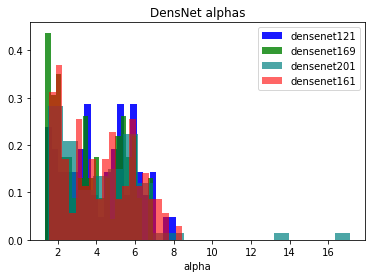

In [31]:
colors = ['blue', 'green', 'teal',  'red']
transparency = 1.0
for im, details in enumerate(all_details):
    alphas = details.alpha.to_numpy()
    transparency -= 0.1
    
    plt.hist(alphas, bins=20, label=all_names[im], alpha=transparency, color=colors[im], density=True)
plt.legend()
plt.title("DensNet alphas")
plt.xlabel("alpha")

Text(0.5, 0, 'alpha')

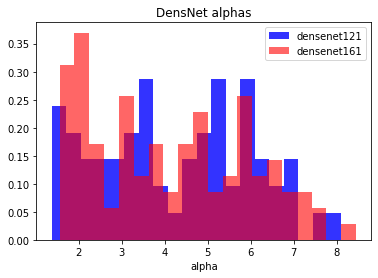

In [32]:
colors = ['blue', 'green', 'teal',  'red']
transparency = 1.0
for im, details in enumerate(all_details):
    if im == 0 or im == 3:
        alphas = details.alpha.to_numpy()
        transparency -= 0.2

        plt.hist(alphas, bins=20, label=all_names[im], alpha=transparency, color=colors[im], density=True)
plt.legend()
plt.title("DensNet alphas")
plt.xlabel("alpha")

Text(0.5, 0, 'log Frobenius Norm ')

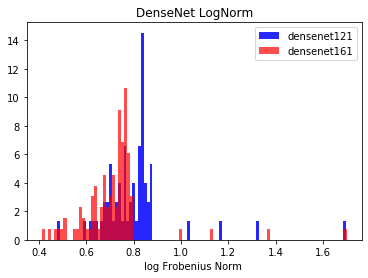

In [33]:
colors = ['blue', 'green', 'teal',  'red']
transparency = 1.0
for im, details in enumerate(all_details):
    if im == 0 or im == 3:
        logNorm = details.lognorm.to_numpy()
        transparency -= 0.15

        plt.hist(logNorm, bins=100, label=all_names[im], alpha=transparency, color=colors[im], density=True)
plt.legend()
plt.title("DenseNet LogNorm")
plt.xlabel("log Frobenius Norm ")

Text(0.5, 0, 'Log Stable (Soft) Rank')

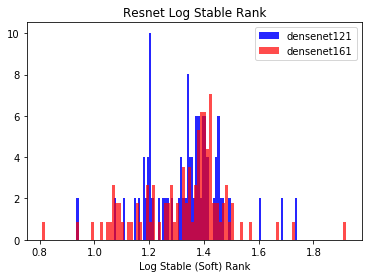

In [34]:
colors = ['blue', 'green', 'teal',  'red']
transparency = 1.0
for im, details in enumerate(all_details):
    if im==0 or im == 3:
        logNorm = details.softranklog.to_numpy()
        transparency -= 0.15

        plt.hist(logNorm, bins=100, label=all_names[im], alpha=transparency, color=colors[im], density=True)
plt.legend()
plt.title("Resnet Log Stable Rank")
plt.xlabel("Log Stable (Soft) Rank")

Text(0.5, 0, 'Log Spectral Norm')

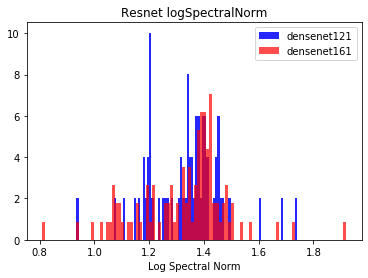

In [35]:
colors = ['blue', 'green', 'teal',  'red']
transparency = 1.0
for im, details in enumerate(all_details):
    if im==0 or im == 3:
        logSpectralNorm = details.softranklog.to_numpy()
        transparency -= 0.15

        plt.hist(logSpectralNorm, bins=100, label=all_names[im], alpha=transparency, color=colors[im], density=True)
plt.legend()
plt.title("Resnet logSpectralNorm")
plt.xlabel("Log Spectral Norm")

Text(0.5, 0, 'MP Soft Rank')

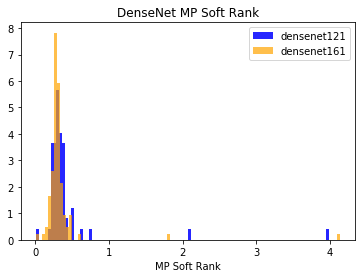

In [36]:
colors = ['blue', 'green', 'teal', 'orange', 'red']
transparency = 1.0
for im, details in enumerate(all_details):
    if im==0 or im == 3:
        MpSoftRank = details.softrank_mp.to_numpy()
        transparency -= 0.15

        plt.hist(MpSoftRank, bins=100, label=all_names[im], alpha=transparency, color=colors[im], density=True)
plt.legend()
plt.title("DenseNet MP Soft Rank")
plt.xlabel("MP Soft Rank")